In [48]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
#pip install seaborn
import pandas as pd
import numpy as np

In [5]:
birds=pd.read_csv('/Users/iremcakcak/Documents/data-science/data-science-week3/data-science/data/birds.csv')

In [6]:
birds

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,Blue grosbeak,Passerina caerulea,Cardinals/Allies,Passeriformes,Cardinalidae,Passerina,LC,14.0,19.0,26.0,31.5,26.0,29.0
439,Lazuli bunting,Passerina amoena,Cardinals/Allies,Passeriformes,Cardinalidae,Passerina,LC,13.0,15.0,13.0,18.0,22.0,22.0
440,Indigo bunting,Passerina cyanea,Cardinals/Allies,Passeriformes,Cardinalidae,Passerina,LC,11.5,15.0,11.2,21.4,18.0,23.0
441,Painted bunting,Passerina ciris,Cardinals/Allies,Passeriformes,Cardinalidae,Passerina,LC,12.0,14.0,13.0,19.0,21.0,23.0


In [61]:
birds.describe().T

,count,mean,std,min,25%,50%,75%,max
MinLength,443.0,28.536682,20.319887,7.0,13.75,20.5,39.00,138.0
MaxLength,443.0,35.441986,27.539772,8.9,16.00,25.0,46.00,180.0
MinBodyMass,443.0,327.938262,779.680106,2.0,18.00,55.0,332.00,9200.0
MaxBodyMass,443.0,667.009752,1655.682564,3.0,28.00,89.0,593.00,14300.0
MinWingspan,443.0,58.557901,104.602369,8.0,23.00,38.0,72.75,1800.0
MaxWingspan,443.0,67.524492,126.673177,10.6,25.00,42.0,83.00,2300.0


In [58]:
birds.isnull().sum()

Name                  0
ScientificName        0
Category              0
Order                 0
Family                0
Genus                 0
ConservationStatus    0
MinLength             0
MaxLength             0
MinBodyMass           0
MaxBodyMass           0
MinWingspan           0
MaxWingspan           0
dtype: int64

In [11]:
cat_cols=[
    'Category',
    'Order',
    'Family',
    'Genus',
    'ConservationStatus'
]

In [21]:
for i in cat_cols:
    a=birds[i].nunique()
    print(f"{i}: {a}")

Category: 60
Order: 21
Family: 59
Genus: 238
ConservationStatus: 6


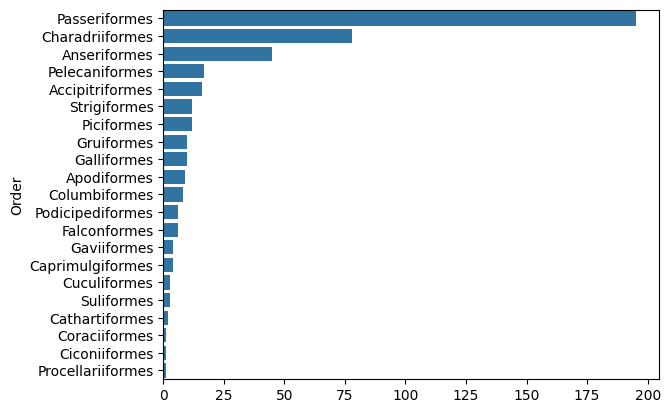

In [34]:
grouped_counts = birds.groupby("Order")["ConservationStatus"].count().sort_values(ascending=False)
#sorted_counts = grouped_counts.sort_values(ascending=False)
#print(sorted_counts)
sns.barplot(x = grouped_counts.values, y = grouped_counts.index);

In [38]:
grouped_length=birds.groupby(["Family","Name"])['MaxLength'].max().sort_values(ascending=False)
print(grouped_length)


Family       Name                     
Anatidae     Trumpeter swan               180.0
Pelecanidae  American white pelican       180.0
Anatidae     Mute swan                    170.0
Gruidae      Whooping crane               160.0
Pelecanidae  Brown pelican                152.0
                                          ...  
Trochilidae  Anna's hummingbird            10.9
             Calliope hummingbird          10.0
             Rufous hummingbird             9.0
             Ruby-throated hummingbird      9.0
             Costa's hummingbird            8.9
Name: MaxLength, Length: 443, dtype: float64


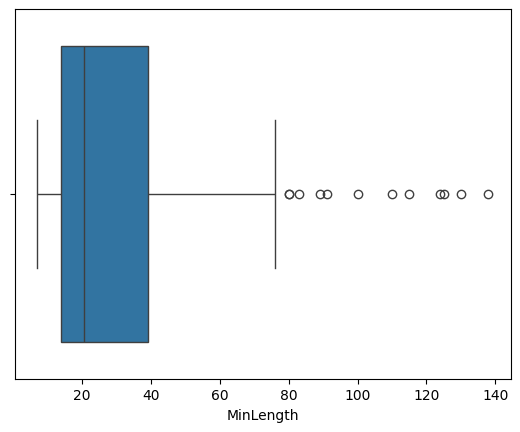

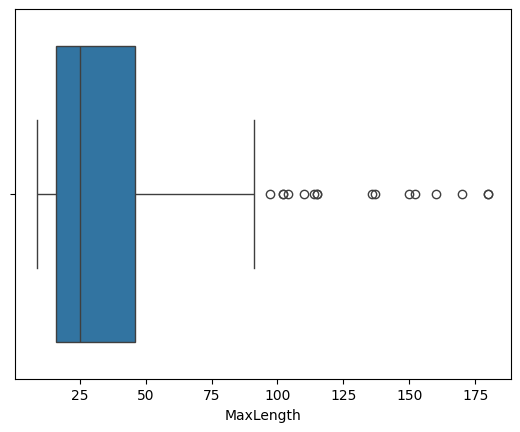

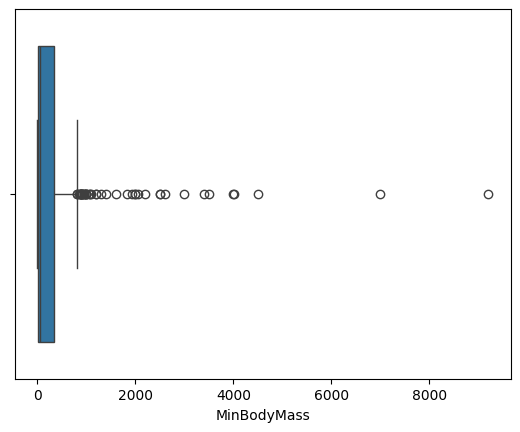

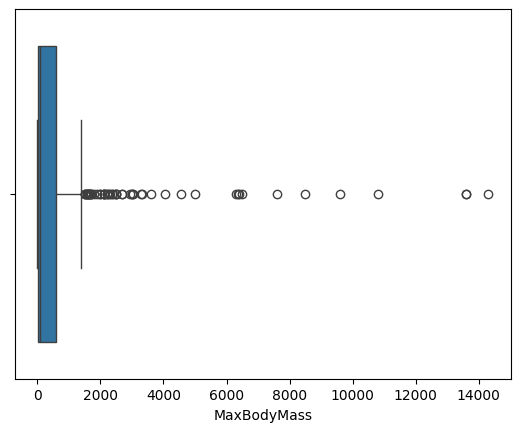

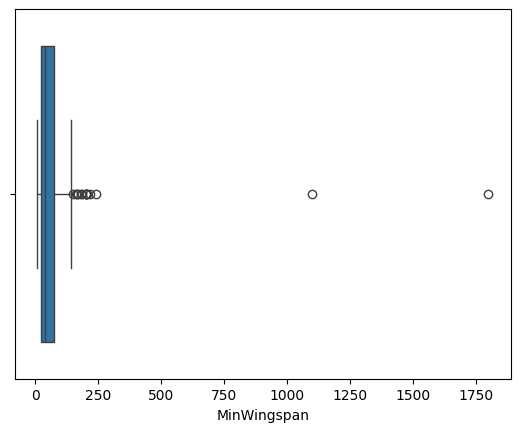

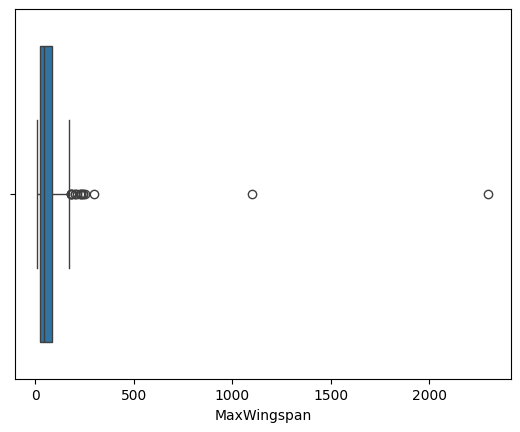

In [64]:
num_cols=[
    'MinLength','MaxLength', 'MinBodyMass',	'MaxBodyMass',	'MinWingspan',	'MaxWingspan'
]
for num in num_cols:
    sns.boxplot(x=birds[num],data=birds)
    plt.show()


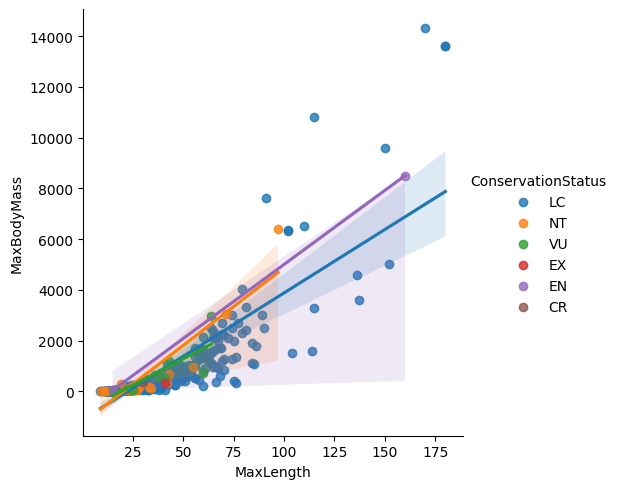

In [46]:
sns.lmplot(
    x='MaxLength',
    y='MaxBodyMass',
    data=birds,
    hue='ConservationStatus'
)

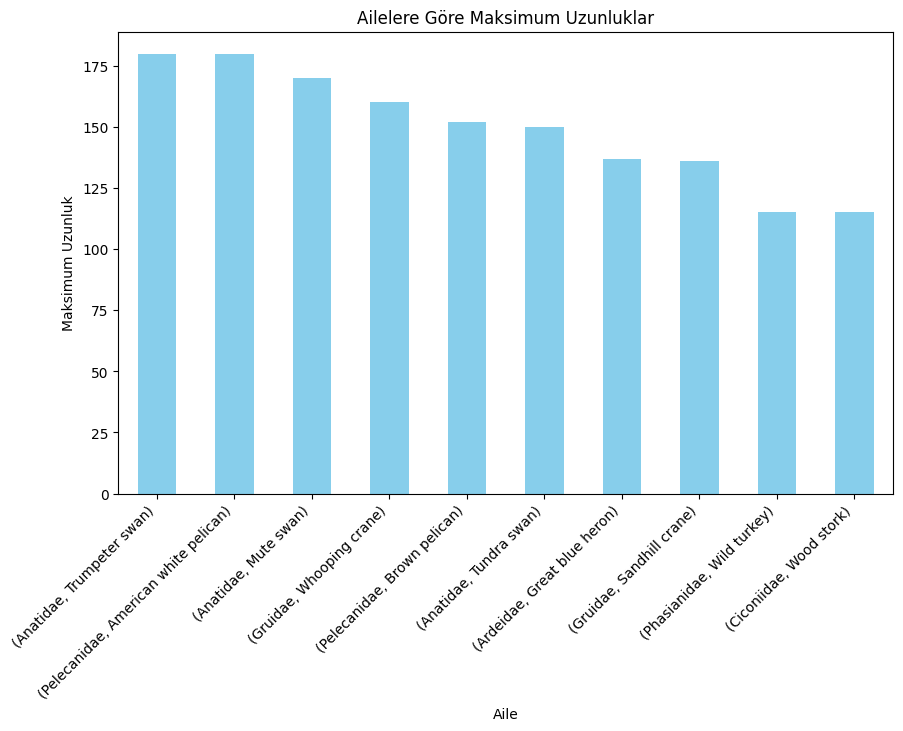

In [41]:
plt.figure(figsize=(10, 6))
sorted_max_lengths[:10].plot(kind='bar', color='skyblue')
plt.title('Ailelere Göre Maksimum Uzunluklar')
plt.xlabel('Aile')
plt.ylabel('Maksimum Uzunluk')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [37]:
max_lengths_by_family = birds.groupby(['Family' , 'Name'])['MaxLength'].max()

# Büyükten küçüğe sıralama
sorted_max_lengths = max_lengths_by_family.sort_values(ascending=False)

# Sonuçları görüntüleme
print(sorted_max_lengths)

Family       Name                     
Anatidae     Trumpeter swan               180.0
Pelecanidae  American white pelican       180.0
Anatidae     Mute swan                    170.0
Gruidae      Whooping crane               160.0
Pelecanidae  Brown pelican                152.0
                                          ...  
Trochilidae  Anna's hummingbird            10.9
             Calliope hummingbird          10.0
             Rufous hummingbird             9.0
             Ruby-throated hummingbird      9.0
             Costa's hummingbird            8.9
Name: MaxLength, Length: 443, dtype: float64


In [28]:
birds.groupby("Order")["ConservationStatus"].count().sort_values(ascending = False)

Order
Passeriformes        195
Charadriiformes       78
Anseriformes          45
Pelecaniformes        17
Accipitriformes       16
Strigiformes          12
Piciformes            12
Gruiformes            10
Galliformes           10
Apodiformes            9
Columbiformes          8
Podicipediformes       6
Falconformes           6
Gaviiformes            4
Caprimulgiformes       4
Cuculiformes           3
Suliformes             3
Cathartiformes         2
Coraciiformes          1
Ciconiiformes          1
Procellariiformes      1
Name: ConservationStatus, dtype: int64

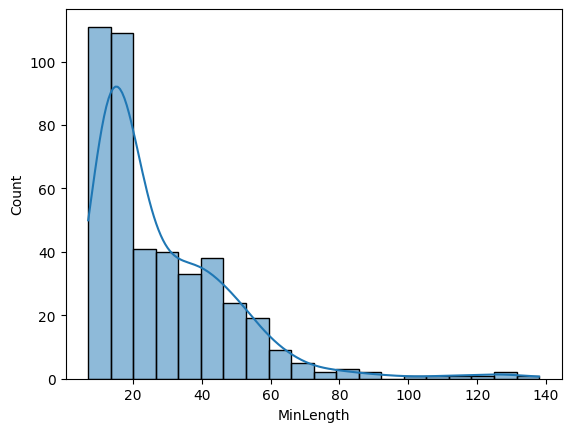

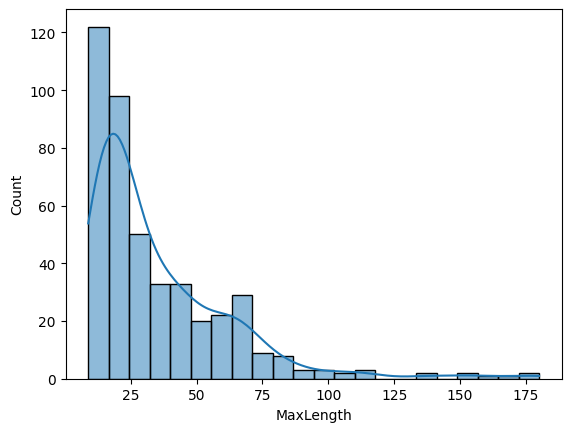

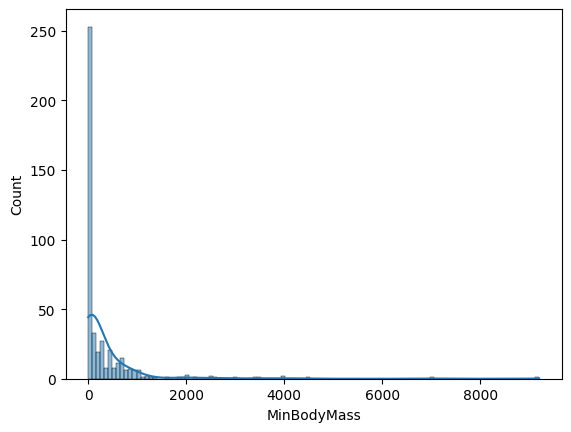

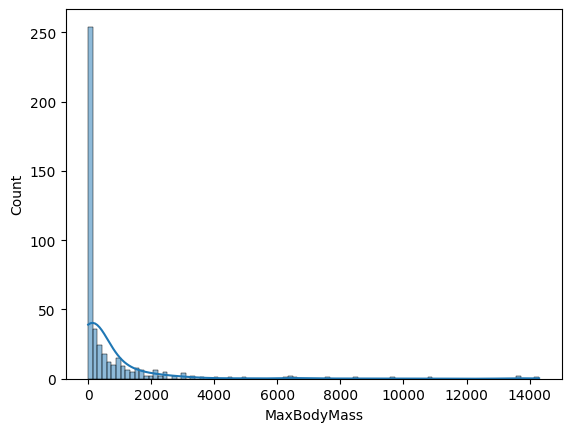

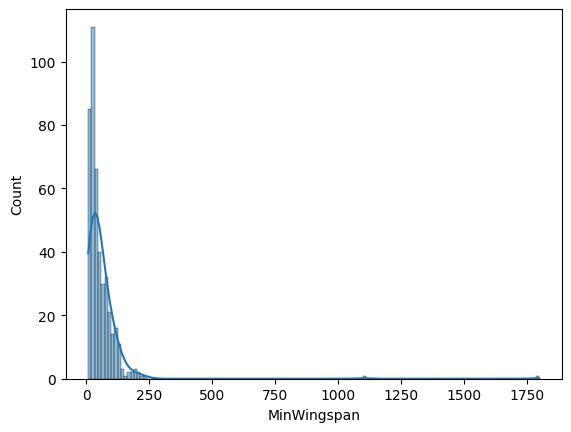

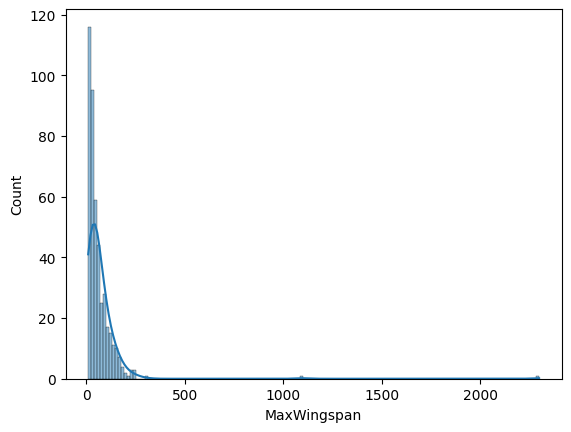

In [67]:
for num in num_cols:
    sns.histplot(x =birds[num], kde=True)
    plt.show()


In [68]:
max_mass_by_family = birds.groupby(['Family' , 'Name'])['MaxBodyMass'].max()

# Büyükten küçüğe sıralama
sorted_max_mass = max_lengths_by_family.sort_values(ascending=False)



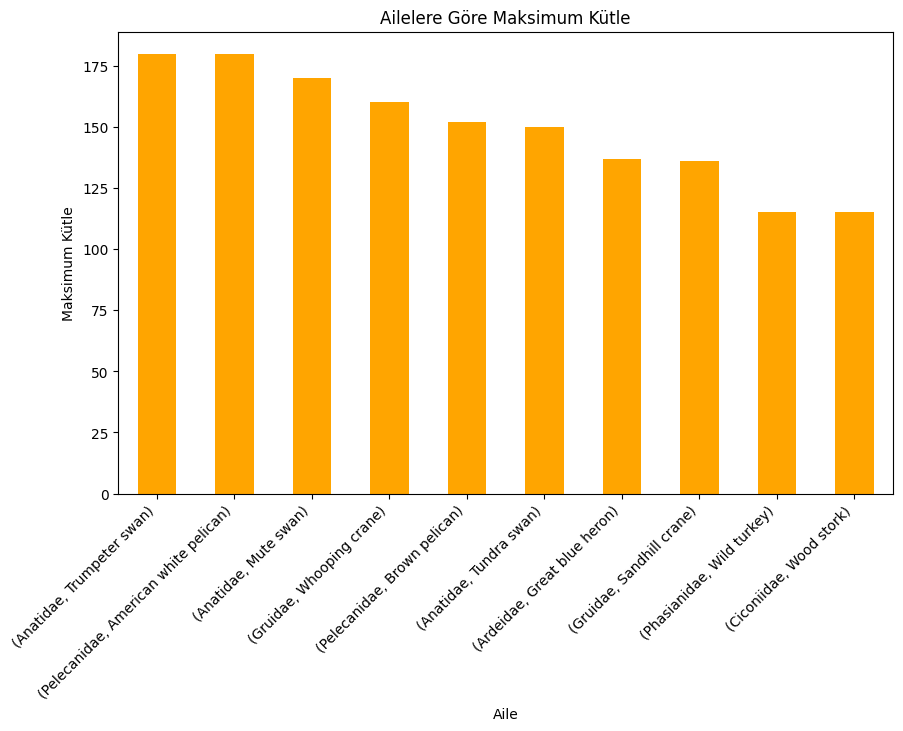

In [70]:
plt.figure(figsize=(10, 6))
sorted_max_mass[:10].plot(kind='bar', color='orange')
plt.title('Ailelere Göre Maksimum Kütle')
plt.xlabel('Aile')
plt.ylabel('Maksimum Kütle')
plt.xticks(rotation=45, ha='right')  
plt.show()